# MACHINE LEARNING: REGRESSION

## Importing Libraries

In [75]:
# Import libraries for data manipulation
import pandas as pd

import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt

import seaborn as sns

from statsmodels.graphics.gofplots import ProbPlot

# Import libraries for building linear regression model
from statsmodels.formula.api import ols

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

from statsmodels.stats.outliers_influence import variance_inflation_factor

import pylab
import scipy.stats as stats


from sklearn.preprocessing import StandardScaler


## Loading DataFrame

In [80]:
data = pd.read_csv("Life Expectancy Data.csv")

data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Data Preprocessing

In [82]:
data = data.drop(columns='Country')

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   object 
 2   Life expectancy                  2928 non-null   float64
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

In [84]:
data.isnull().sum()

Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

## Imputing Null Values

In [85]:
# Categorical Columns
Cat_cols = ['Status']

# Numeric Columns
Num_cols = ['Year', 'Life expectancy ', 'Adult Mortality','infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure','Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',' thinness  1-19 years', ' thinness 5-9 years','Income composition of resources', 'Schooling']


In [87]:
# Filling NaN Numeric with median
data.fillna(data.median(), inplace = True)

In [88]:
data.isnull().sum()

Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

## EDA

Year
Skew : -0.01


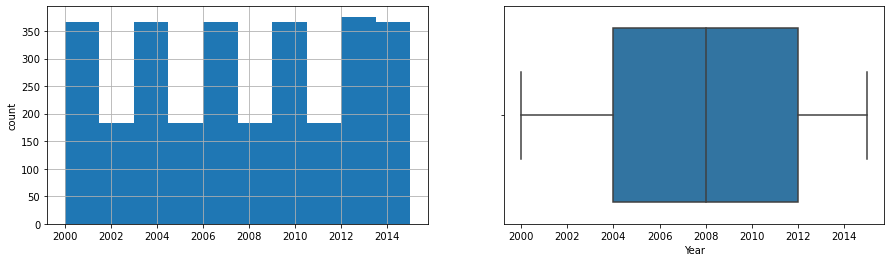

Life expectancy 
Skew : -0.64


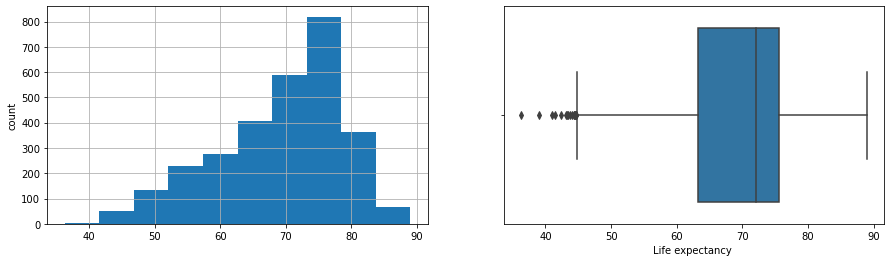

Adult Mortality
Skew : 1.18


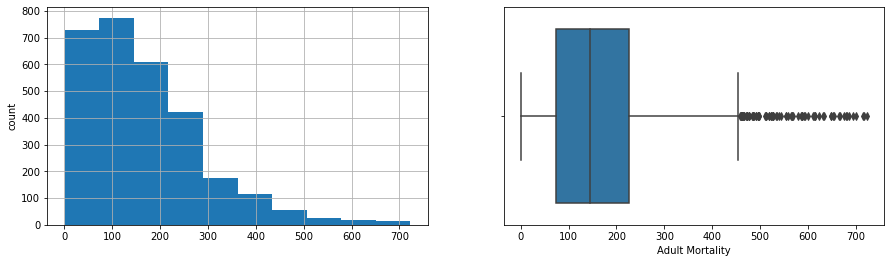

infant deaths
Skew : 9.79


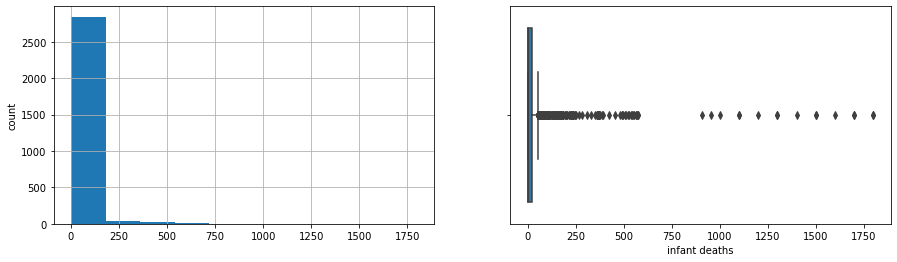

Alcohol
Skew : 0.65


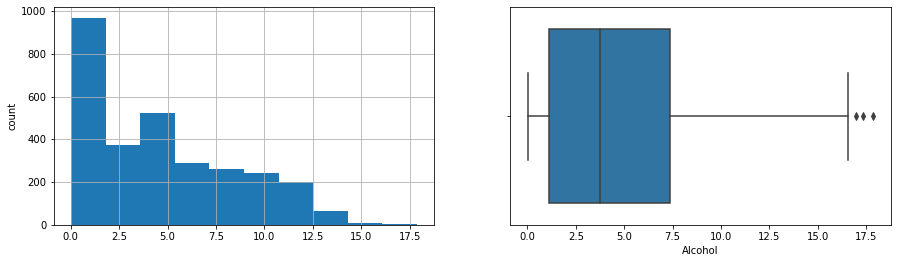

percentage expenditure
Skew : 4.65


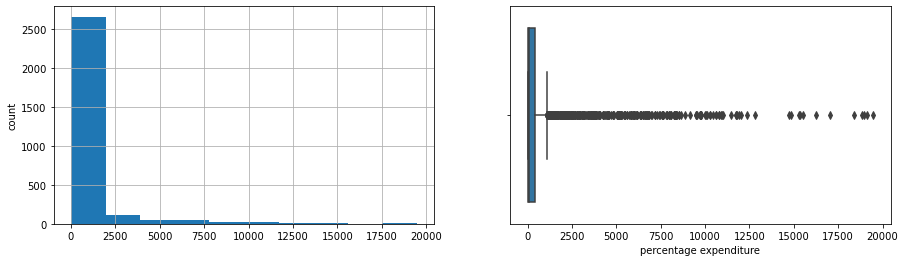

Hepatitis B
Skew : -2.28


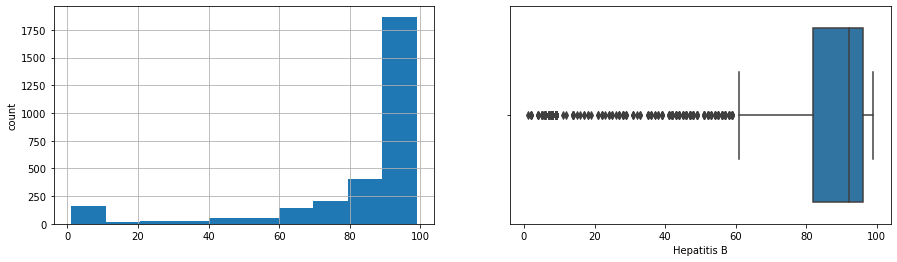

Measles 
Skew : 9.44


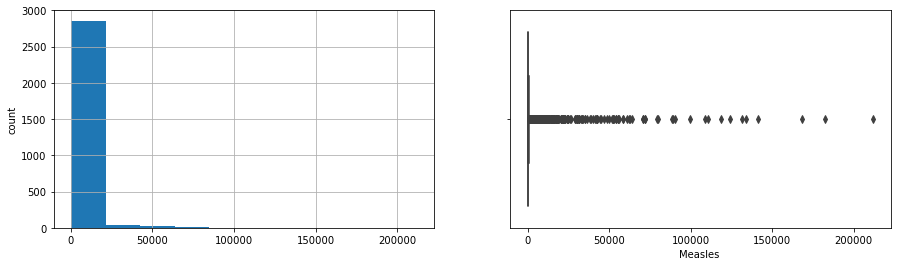

 BMI 
Skew : -0.23


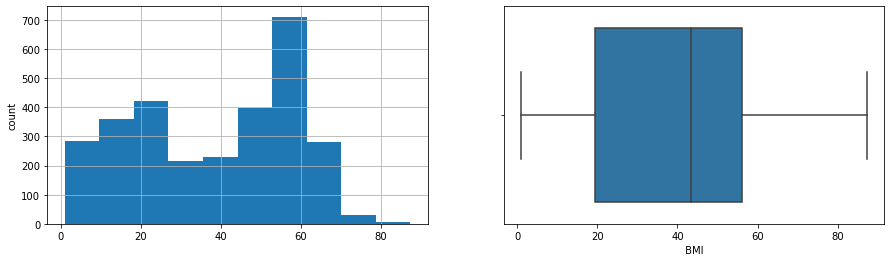

under-five deaths 
Skew : 9.5


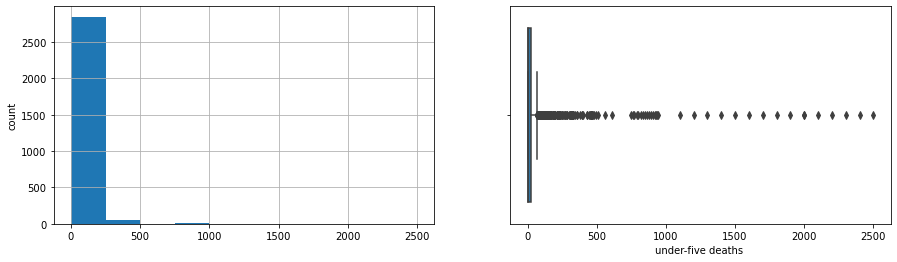

Polio
Skew : -2.11


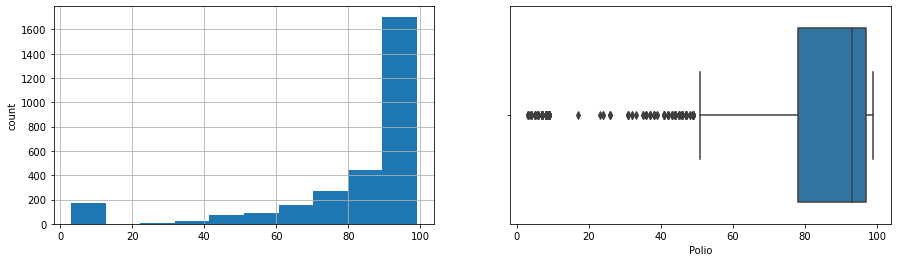

Total expenditure
Skew : 0.66


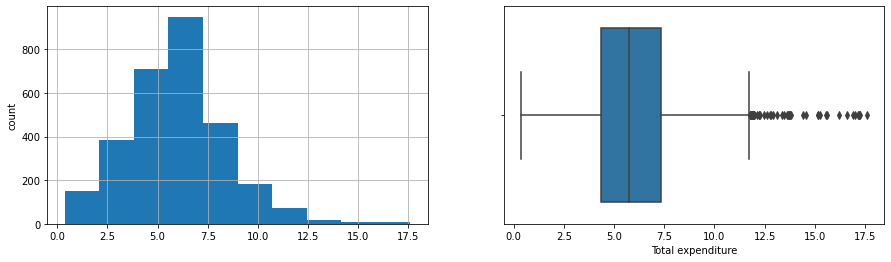

Diphtheria 
Skew : -2.08


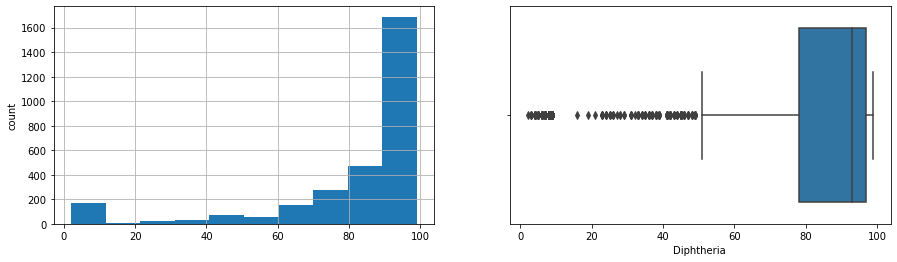

 HIV/AIDS
Skew : 5.4


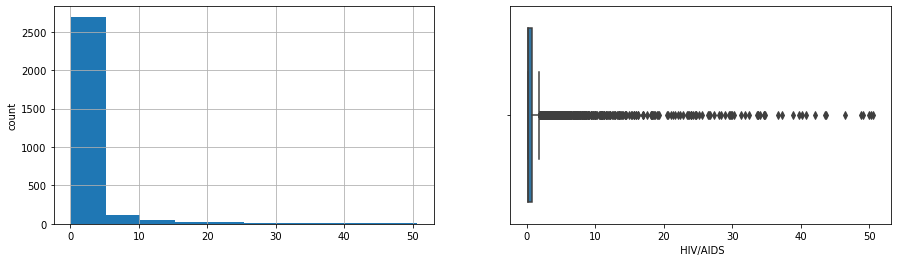

GDP
Skew : 3.54


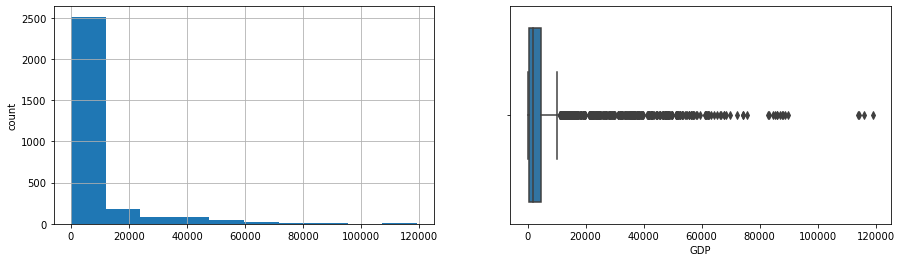

Population
Skew : 17.97


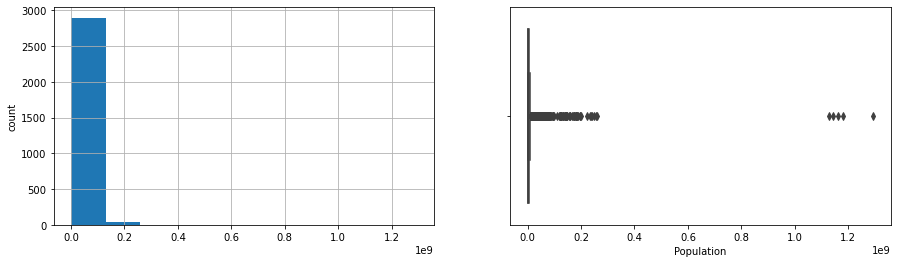

 thinness  1-19 years
Skew : 1.73


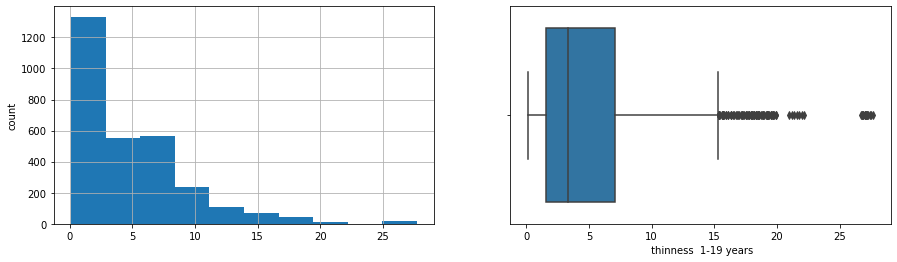

 thinness 5-9 years
Skew : 1.8


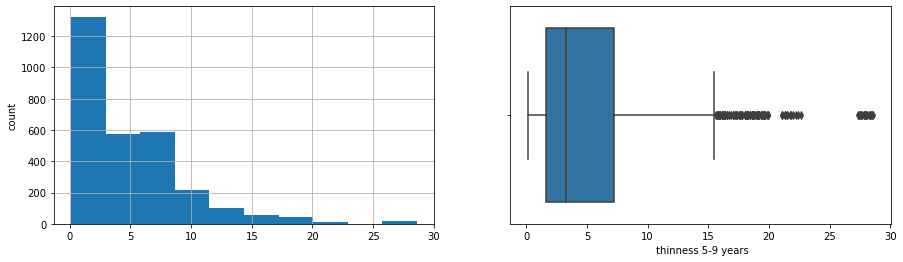

Income composition of resources
Skew : -1.21


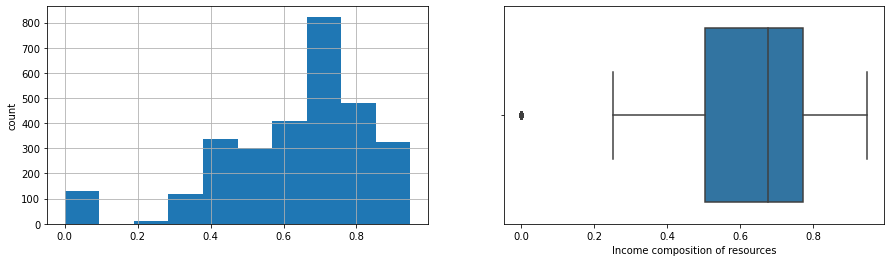

Schooling
Skew : -0.64


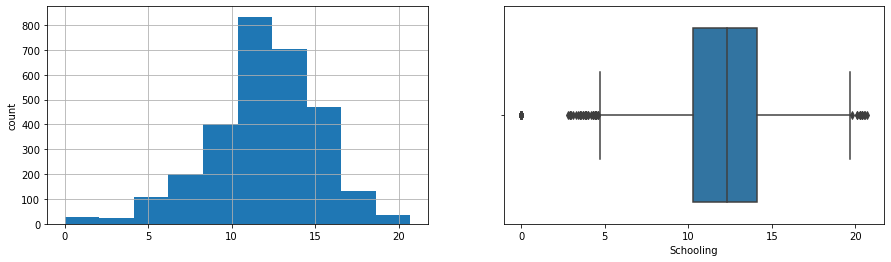

In [124]:
plot_distributions(data[Num_cols])

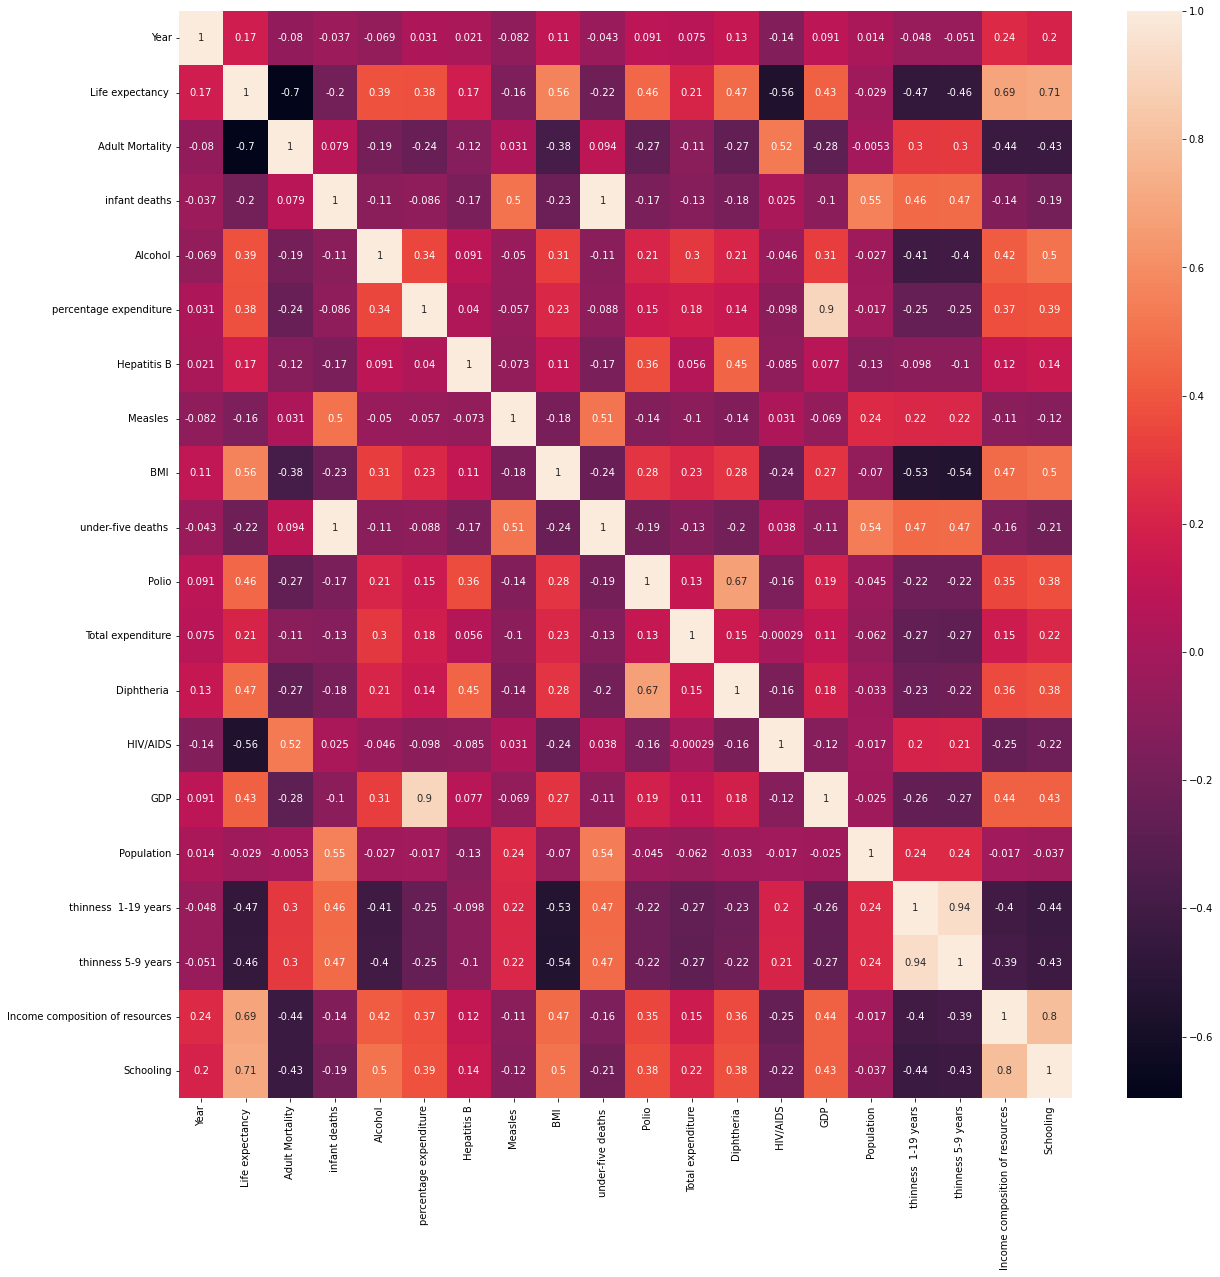

In [126]:
# Plotting Heatmap
plt.figure(figsize = (20, 20))

sns.heatmap(data.corr(), annot = True)

plt.show()

## Data Preparation

In [89]:
# Selecting Dependent Variable Y
Y = data['Life expectancy ']

# Selecting Independent Variables X
X = data.drop(columns = ['Life expectancy ']) 

In [90]:
# Creating dummy variables
X = pd.get_dummies(X, drop_first = True)

In [91]:
# Adding the intercept term
X = sm.add_constant(X)

# Splitting the data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

# Linear Regression - Model 1

In [92]:
# Create the model
OLS1 = sm.OLS(Y_train, X_train).fit()

# Get the model summary
OLS1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Life expectancy    R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     479.1
Date:                Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                        02:27:33   Log-Likelihood:                -5773.1
No. Observations:                2056   AIC:                         1.159e+04
Df Residuals:                    2035   BIC:                         1.171e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              85.3145     41.449      2.058      0.040       4.028     166.601
Year                               -0.0145      0.021     -0.698      0.485      -0.055       0.026
Adult Mortality                    -0.0194      0.001    -20.546      0.000      -0.021      -0.018
infant deaths                       0.1047      0.010     10.260      0.000       0.085       0.125
Alcohol                             0.0699      0.031      2.238      0.025       0.009       0.131
percentage expenditure           -6.82e-06      0.000     -0.066      0.947      -0.000       0.000
Hepatitis B                        -0.0194      0.005     -4.194      0.000      -0.028      -0.010
Measles                         -2.054e-05    9.7e-06     -2.119      0.034   -3.96e-05   -1.53e-06
 BMI                                0.0448      0.006      7.495      0.000       0.033       0.057
under-five deaths                  -0.0781      0.007    -10.437      0.000      -0.093      -0.063
Polio                               0.0333      0.005      6.252      0.000       0.023       0.044
Total expenditure                   0.0359      0.041      0.877      0.380      -0.044       0.116
Diphtheria                          0.0434      0.006      7.772      0.000       0.032       0.054
 HIV/AIDS                          -0.4763      0.021    -22.206      0.000      -0.518      -0.434
GDP                              4.649e-05   1.59e-05      2.932      0.003    1.54e-05    7.76e-05
Population                      -5.478e-10   1.91e-09     -0.287      0.774   -4.29e-09    3.19e-09
 thinness  1-19 years              -0.1010      0.065     -1.565      0.118      -0.228       0.026
 thinness 5-9 years                 0.0198      0.064      0.311      0.756      -0.105       0.144
Income composition of resources     5.0242      0.747      6.725      0.000       3.559       6.489
Schooling                           0.6994      0.049     14.322      0.000       0.604       0.795
Status_Developing                  -1.6167      0.320     -5.044      0.000      -2.245      -0.988
==============================================================================
Omnibus:                       90.741   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.515
Skew:                          -0.165   Prob(JB):                     3.28e-56
Kurtosis:                       4.695   Cond. No.                     2.71e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.71e+10. This might indicate that there are
strong multicollinearity or o

## Linear Regression Assumptions
---
**Multicollinearity**
VIF

**Normality of Error Terms**
Histogram of Residuals

**Heterokedasticity**
Q-Q plot

**Linearity**
Residual Plot

---

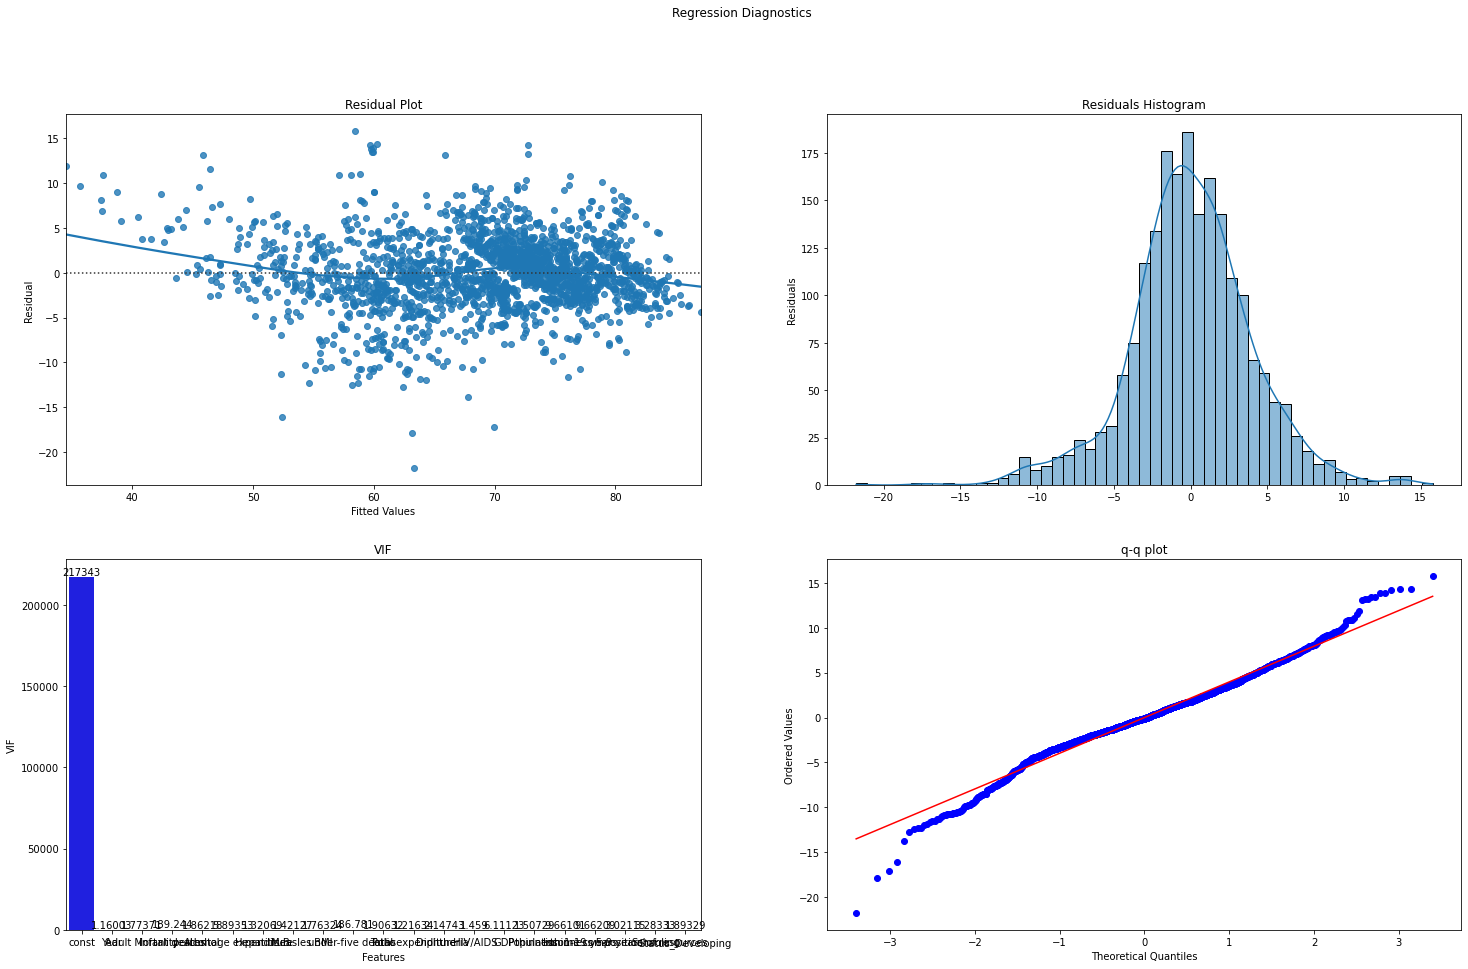

In [93]:
regression_diagnostics(OLS1, X_train)

## Evaluation Metrics

In [94]:
# Checking model performance
model_pref(OLS1, X_train, X_test)  

    Data      RMSE       MAE      MAPE
0  Train  4.010734  2.992350  4.577108
1   Test  4.109580  3.084871  4.698888


# Linear Regression - Model 2

In [102]:
# Selecting Dependent Variable Y
Y = data['Life expectancy ']

# Selecting Independent Variables X
X = data.drop(columns = ['Life expectancy ','Year','percentage expenditure','Total expenditure','Population',' thinness  1-19 years', ' thinness 5-9 years'])


In [103]:
# Creating dummy variables
X = pd.get_dummies(X, drop_first = True)


In [104]:
# Adding the intercept term
X = sm.add_constant(X)

# Splitting the data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)


In [105]:
# Create the model
OLS2 = sm.OLS(Y_train, X_train).fit()

# Get the model summary
OLS2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Life expectancy    R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     682.4
Date:                Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                        02:32:25   Log-Likelihood:                -5778.1
No. Observations:                2056   AIC:                         1.159e+04
Df Residuals:                    2041   BIC:                         1.167e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              56.0185      0.732     76.489      0.000      54.582      57.455
Adult Mortality                    -0.0196      0.001    -20.815      0.000      -0.021      -0.018
infant deaths                       0.1032      0.010     10.255      0.000       0.083       0.123
Alcohol                             0.0940      0.030      3.160      0.002       0.036       0.152
Hepatitis B                        -0.0197      0.005     -4.277      0.000      -0.029      -0.011
Measles                         -1.971e-05   9.67e-06     -2.039      0.042   -3.87e-05   -7.55e-07
 BMI                                0.0510      0.006      9.189      0.000       0.040       0.062
under-five deaths                  -0.0779      0.007    -10.477      0.000      -0.093      -0.063
Polio                               0.0326      0.005      6.137      0.000       0.022       0.043
Diphtheria                          0.0435      0.006      7.829      0.000       0.033       0.054
 HIV/AIDS                          -0.4792      0.021    -22.645      0.000      -0.521      -0.438
GDP                              4.535e-05   7.59e-06      5.972      0.000    3.05e-05    6.02e-05
Income composition of resources     4.9972      0.738      6.768      0.000       3.549       6.445
Schooling                           0.6984      0.049     14.369      0.000       0.603       0.794
Status_Developing                  -1.7384      0.316     -5.505      0.000      -2.358      -1.119
==============================================================================
Omnibus:                       87.368   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              249.163
Skew:                          -0.139   Prob(JB):                     7.85e-55
Kurtosis:                       4.683   Cond. No.                     1.39e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Linear Regression Assumptions
---
### **Multicollinearity**


### **Normality of Error Terms**


### **Heterokedasticity**


### **Linearity**
---

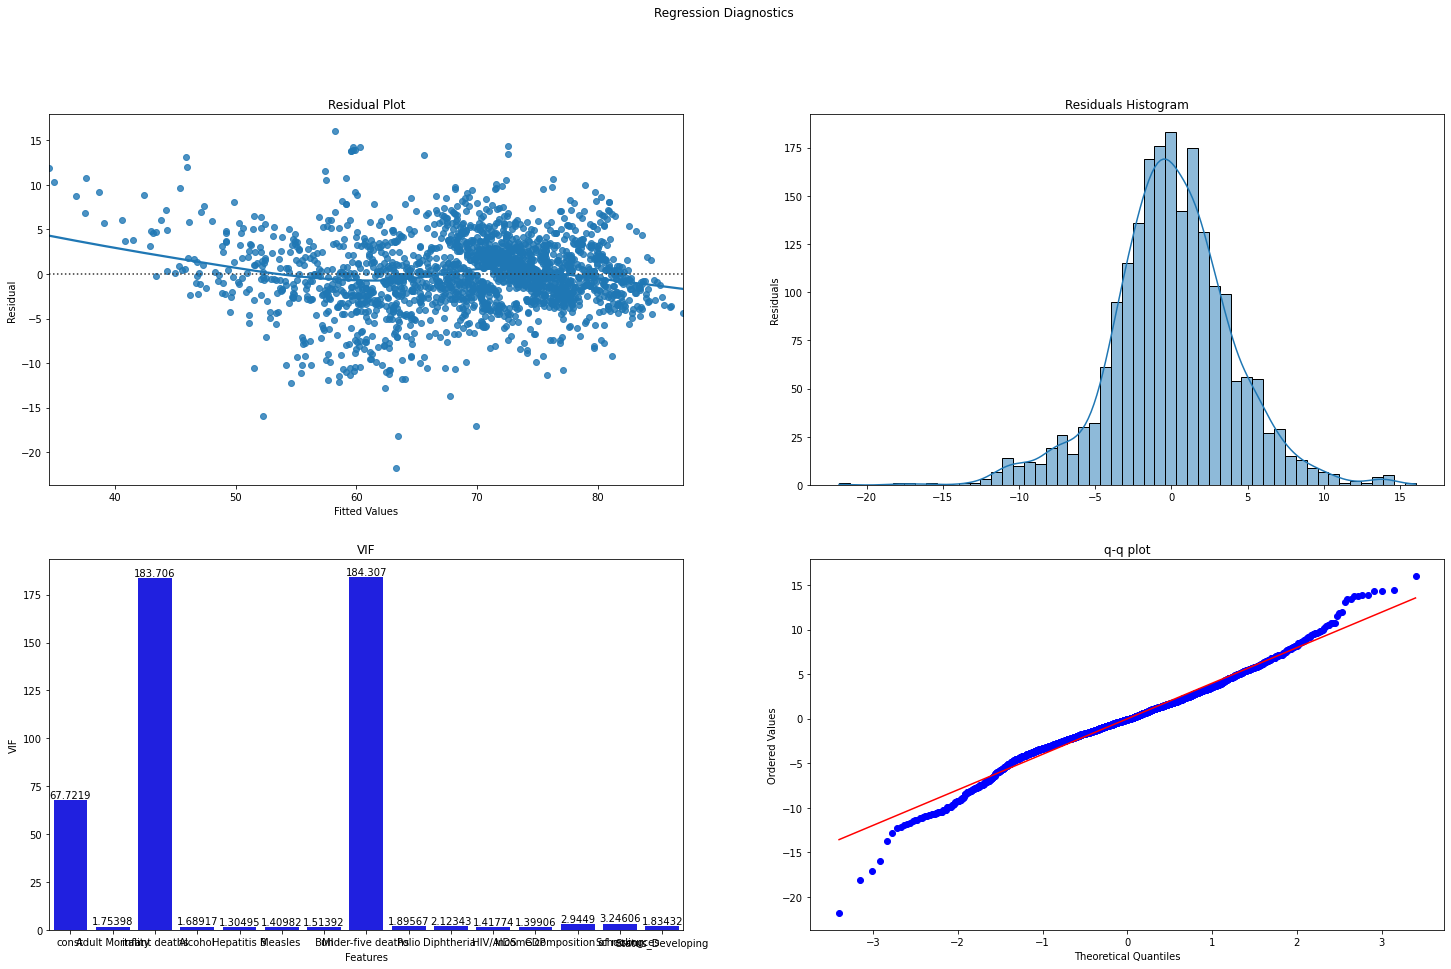

In [106]:
regression_diagnostics(OLS2, X_train)

## Evaluation Metrics

In [107]:
# Checking model performance
model_pref(OLS2, X_train, X_test)  

    Data      RMSE       MAE      MAPE
0  Train  4.020602  3.000391  4.584312
1   Test  4.118014  3.089249  4.699216


# Linear Regression - Model 3

In [108]:
# Selecting Dependent Variable Y
Y = data['Life expectancy ']

# Selecting Independent Variables X
X = data.drop(columns = ['Life expectancy ','Year','percentage expenditure','Total expenditure','Population',' thinness  1-19 years', ' thinness 5-9 years','infant deaths','under-five deaths '])


In [109]:
# Creating dummy variables
X = pd.get_dummies(X, drop_first = True)


In [110]:
# Adding the intercept term
X = sm.add_constant(X)

# Splitting the data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)


In [111]:
# Create the model
OLS3 = sm.OLS(Y_train, X_train).fit()

# Get the model summary
OLS3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Life expectancy    R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     745.8
Date:                Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                        02:36:03   Log-Likelihood:                -5833.9
No. Observations:                2056   AIC:                         1.169e+04
Df Residuals:                    2043   BIC:                         1.177e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              54.4234      0.731     74.488      0.000      52.991      55.856
Adult Mortality                    -0.0199      0.001    -20.637      0.000      -0.022      -0.018
Alcohol                             0.0584      0.030      1.923      0.055      -0.001       0.118
Hepatitis B                        -0.0213      0.005     -4.558      0.000      -0.031      -0.012
Measles                         -2.499e-05   8.58e-06     -2.912      0.004   -4.18e-05   -8.16e-06
 BMI                                0.0538      0.006      9.503      0.000       0.043       0.065
Polio                               0.0363      0.005      6.665      0.000       0.026       0.047
Diphtheria                          0.0517      0.006      9.160      0.000       0.041       0.063
 HIV/AIDS                          -0.4887      0.022    -22.523      0.000      -0.531      -0.446
GDP                              4.199e-05   7.79e-06      5.389      0.000    2.67e-05    5.73e-05
Income composition of resources     5.4272      0.757      7.173      0.000       3.943       6.911
Schooling                           0.7350      0.050     14.775      0.000       0.637       0.833
Status_Developing                  -1.6839      0.324     -5.193      0.000      -2.320      -1.048
==============================================================================
Omnibus:                       91.244   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.896
Skew:                          -0.165   Prob(JB):                     9.97e-57
Kurtosis:                       4.703   Cond. No.                     1.37e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Linear Regression Assumptions
---
### **Multicollinearity**


### **Normality of Error Terms**


### **Heterokedasticity**


### **Linearity**
---

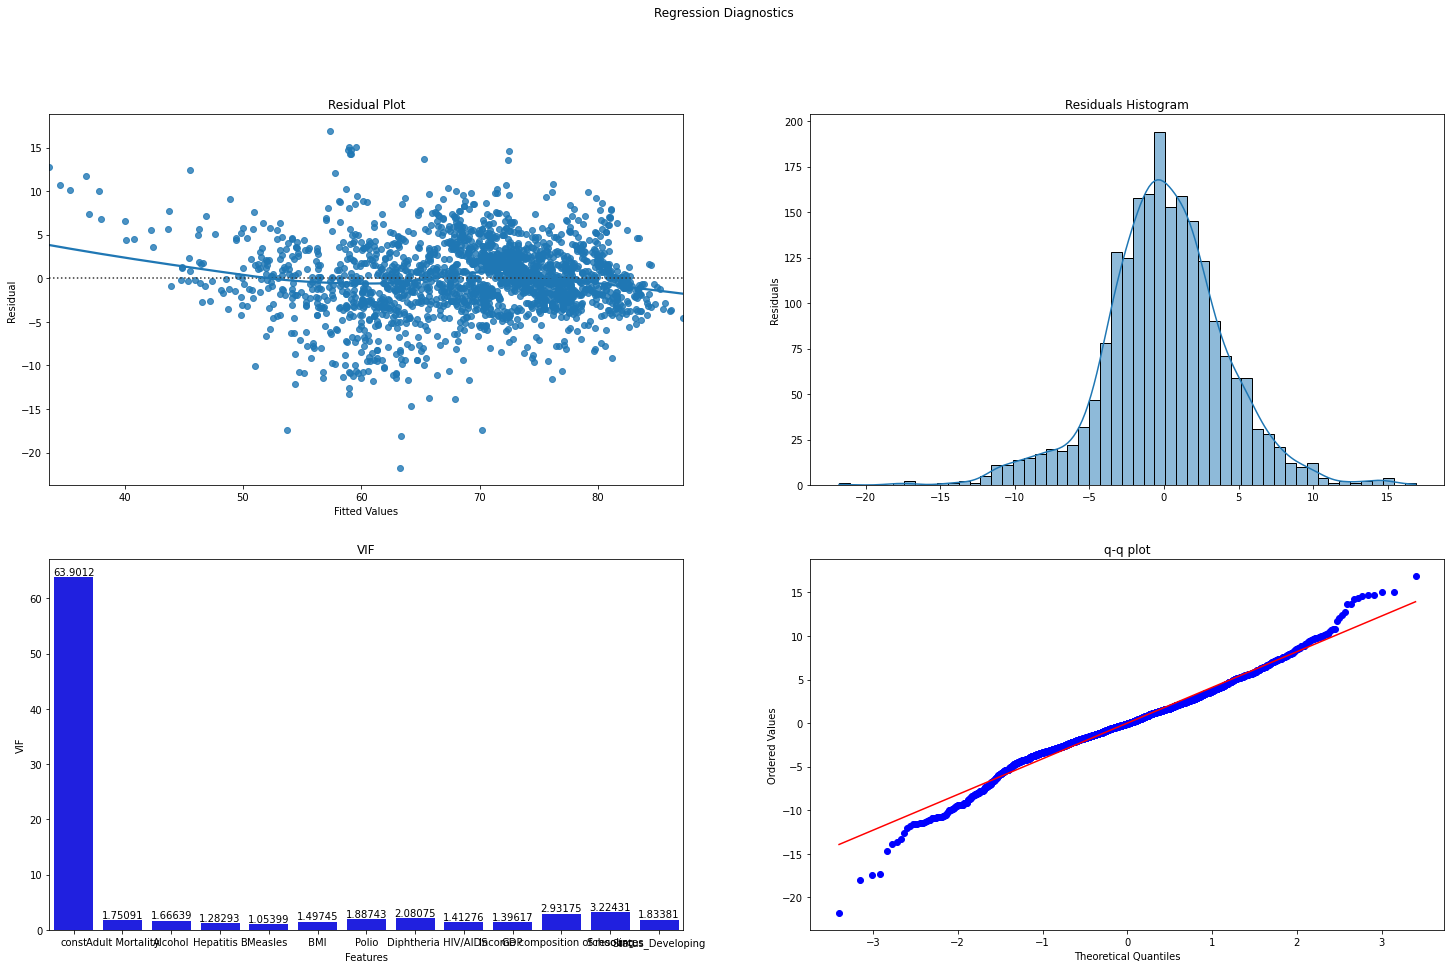

In [112]:
regression_diagnostics(OLS3, X_train)

## Evaluation Metrics

In [113]:
# Checking model performance
model_pref(OLS3, X_train, X_test)  

    Data      RMSE       MAE      MAPE
0  Train  4.131244  3.079585  4.713605
1   Test  4.214562  3.163660  4.807014


## Parameters

In [114]:
params_df(OLS3)

,Feature,Coefficients
0,const,54.423378
10,Income composition of resources,5.427164
11,Schooling,0.735042
2,Alcohol,0.058399
5,BMI,0.053816
7,Diphtheria,0.051703
6,Polio,0.036327
9,GDP,0.000042
4,Measles,-0.000025
1,Adult Mortality,-0.019928



# Index


In [27]:
def regression_diagnostics(model, X_train):

    # Mean for Residuals
    residuals = model.resid
     
    #VIF
    vif = pd.DataFrame()
    
    vif["feature"] = X_train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
    variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))
    ]

    # Predicted values
    fitted = model.fittedvalues

    #Plotting Diagnostics
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (25, 15))
  
    fig.suptitle('Regression Diagnostics')
  


    # Linearity of Variables
    # Residual Plot
    sns.residplot(x = fitted, y = residuals, lowess = True, ax=ax1)

    ax1.set_xlabel("Fitted Values")
    ax1.set_ylabel("Residual")
    ax1.set_title("Residual Plot")

  
    # Normality of Error Terms
    # Plot histogram of residuals
    sns.histplot(residuals, kde = True, ax = ax2)
    
    ax2.set_ylabel("Residuals")

    ax2.set_title("Residuals Histogram")


    # Multicolinearity
    # VIF
    sns.barplot(x="feature", y="VIF",
                     data = vif, errwidth=0, ax=ax3, color='blue')
    
    ax3.bar_label(ax3.containers[0])
    
    ax3.set_xlabel("Features")

    ax3.set_ylabel("VIF")

    ax3.set_title("VIF")
    
    
    # Normality of Error Terms
    # Plot q-q plot of residuals
    stats.probplot(residuals, dist = "norm", plot = pylab)

    ax4.set_xlabel("Theoretical Quantiles")

    ax4.set_ylabel("Ordered Values")

    ax4.set_title("q-q plot")
    
    plt.show()


In [121]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = Y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = Y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )




In [29]:
def params_df(model):
    coefficients = model.params

    return pd.DataFrame({'Feature' : coefficients.index, 'Coefficients' : coefficients.values}).sort_values(by='Coefficients', ascending=False)

In [ ]:
# Plots histograms and boxplots
def plot_distributions(data):
    
    for col in data.columns:
        print(col)

        print('Skew :', round(data[col].skew(), 2))

        plt.figure(figsize = (15, 4))

        plt.subplot(1, 2, 1)

        data[col].hist()

        plt.ylabel('count')

        plt.subplot(1, 2, 2)

        sns.boxplot(x = data[col])

        plt.show()